# Mobile 고객 이탈 분석

* 약정기간이 끝난 고객이 번호이동(이탈)해 가는 문제를 해결하기 위해 어떤 고객이 번호이동(이탈)해 가는지 데이터분석을 해보려한다.
* 고객 이탈여부(CHURN)에 영향을 주는 요인을 찾아 보자.

![](https://d18lkz4dllo6v2.cloudfront.net/cumulus_uploads/entry/23964/mobile%20phones.png)

## 0.환경설정

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

In [2]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### 2) 데이터 로딩

In [3]:
# mobile data
data_path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_NA2.csv"
mobile = pd.read_csv(data_path)
mobile.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,544,1,47711,183,17,730589.0,192,19,5,unsat,little,considering,0
1,689,0,74132,191,43,535092.0,349,15,2,unsat,very_little,no,1
2,3134,1,150419,0,14,204004.0,682,0,6,unsat,very_high,considering,0
3,12523,0,159567,0,58,281969.0,634,1,1,very_unsat,very_high,never_thought,0
4,2374,1,23392,0,0,216707.0,233,0,15,unsat,very_little,no,1


|변수 명|내용|구분|
|	----	|	----	|	----	|
|	COLLEGE	|	대학졸업 여부(1,0)	|		|
|	INCOME	|	연 수입액(달러)	|		|
|	OVERAGE	|	월 초과사용 시간(분)	|		|
|	LEFTOVER	|	월 사용 잔여시간(%)	|		|
|	HOUSE	|	집 가격(달러)	|		|
|	HANDSET_PRICE	|	핸드폰 가격(달러)	|		|
|	AVERAGE_CALL_DURATION	|	평균 통화시간(분)	|		|
|	REPORTED_SATISFACTION	|	만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' )	|		|
|	CONSIDERING_CHANGE_OF_PLAN	|	변경 계획 설문('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it')	|		|
|	**CHURN**	|	이탈여부(1 : 이탈, 0 : 잔류)	|	Label	|


----

## 1.데이터 탐색

## 1-1.단변량 분석

### 1) OVERAGE : 월 초과사용 시간(분)

In [52]:
feature = 'OVERAGE'

In [54]:
mobile[feature].isna().sum()

0

In [55]:
mobile[feature].describe()

count    18000.000000
mean        86.014833
std         85.963981
min         -2.000000
25%          0.000000
50%         59.000000
75%        179.000000
max        335.000000
Name: OVERAGE, dtype: float64

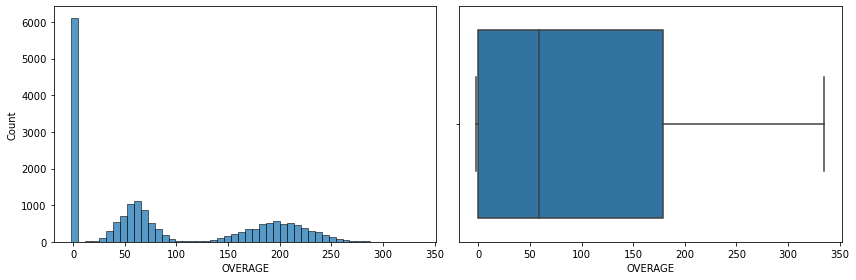

In [56]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(mobile[feature], bins=50)

plt.subplot(1,2,2)
sns.boxplot(mobile[feature])

plt.tight_layout()
plt.show()

* 분석 
    * 0 구간 압도적으로 크다 > 이용자는 자신의 요금제에 알맞게 사용한다.

    * 초과사용 시간이 25-100, 140-250분에 수치가 더 나타난다.
    
- 보통 제공되는 양으로 사용하다가 개인적인 전화나 업무용으로 길어지면
  오버될 가능성이 높다.

추가분석 ) 구간을 0,30-100,150-250 구분해서 분석해 볼 필요 있음

### 2) INCOME : 연 수입액(달러)

In [18]:
feature = 'INCOME'

In [11]:
mobile[feature].isna().sum()

0

In [12]:
mobile[feature].describe()

count     18000.000000
mean      80314.400278
std       41703.420130
min       20007.000000
25%       42151.500000
50%       75501.500000
75%      116082.250000
max      159983.000000
Name: INCOME, dtype: float64

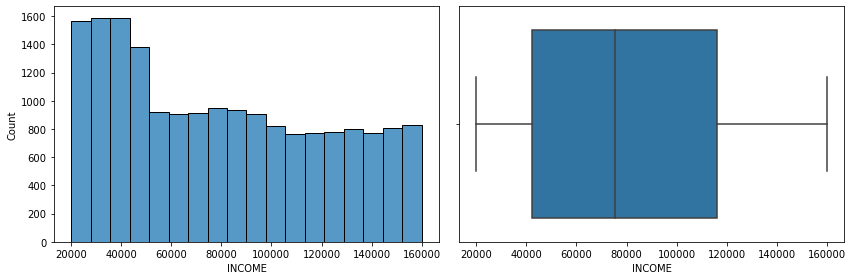

In [19]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(mobile[feature], bins=18)

plt.subplot(1,2,2)
sns.boxplot(mobile[feature])

plt.tight_layout()
plt.show()

* 분석
    * 2만 달러(약 2400만원)-5만달러(약6000만원)의 수치가 크게 나옴
    * 5만달러-10만달러, 11만달러-16만달러 구간별로 비슷한것같다.
    * 평균은8만달러쯤
    

### 3) HANDSET_PRICE : 핸드폰 가격(달러)

In [20]:
feature = 'HANDSET_PRICE'

In [16]:
mobile[feature].isna().sum()

0

In [17]:
mobile[feature].describe()

count    18000.000000
mean       390.096667
std        214.239639
min        130.000000
25%        219.000000
50%        326.000000
75%        536.000000
max        899.000000
Name: HANDSET_PRICE, dtype: float64

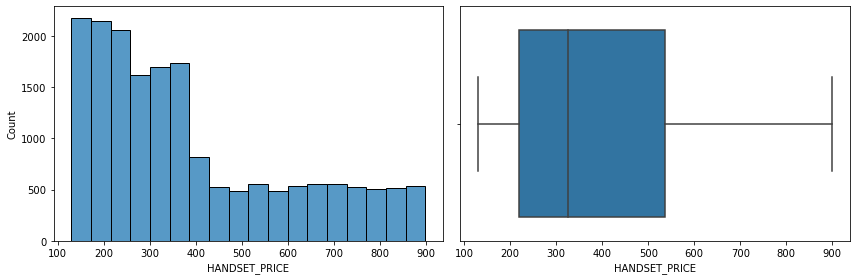

In [21]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(mobile[feature], bins=18)

plt.subplot(1,2,2)
sns.boxplot(mobile[feature])

plt.tight_layout()
plt.show()

* 분석
    * 130-270,270-400,400~ 크게 세구간으로 보임
    특정 구간에 휴대폰을 구입하면 제공되는 혜택이 있을까?
    * 평균 390달러(한화 46만원)
    
> 사람들이 일단 요금을 줄이기 위해 기기값을 최대한 적게 사용할 것임
그런데 수치가 400이후 줄지 않고 비슷한 값으로 유지되는 것을 확인해봐야할것

추가분석 :  400이후 판매량이 비슷한 이유!프로모션이 있나?

### 4) REPORTED_SATISFACTION 
만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' )

In [31]:
feature='REPORTED_SATISFACTION'

In [21]:
mobile[feature].isna().sum()

38

In [26]:
mob=mobile.loc[mobile[feature].notnull()]

In [22]:
mobile[feature].unique()

array(['unsat', 'very_unsat', 'very_sat', 'sat', nan, 'avg'], dtype=object)

In [29]:
tmp=mob[feature].value_counts()/len(mob[feature])
tmp1=mob[feature].value_counts()
print(tmp)

very_unsat    0.393720
very_sat      0.253981
unsat         0.199866
avg           0.100546
sat           0.051887
Name: REPORTED_SATISFACTION, dtype: float64


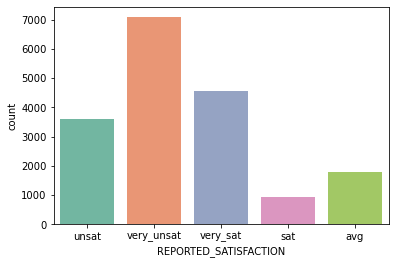

In [32]:
sns.countplot(data=mobile, x=feature, palette="Set2")
plt.show()

* 불만족 수치가 매우큼 > 기기변경할 확률이 높다

대체적으로 불만족하는 수치가 만족보다 크다 >어떤 이유때문에 불만족스러운지 분석.
월 초과사용이 많은지, 핸드폰가격이 비싼지 등을 같이 분석

### 5) CONSIDERING_CHANGE_OF_PLAN
변경 계획 설문('never_thought', 'no', 'perhaps', 'considering', 'actively_looking_into_it')

In [24]:
feature='CONSIDERING_CHANGE_OF_PLAN'

In [38]:
mobile[feature].isna().sum()

0

In [39]:
mobile[feature].unique()

array(['considering', 'no', 'never_thought', 'actively_looking_into_it',
       'perhaps'], dtype=object)

In [40]:
tmp=mobile[feature].value_counts()/len(mobile[feature])
tmp1=mobile[feature].value_counts()
print(tmp)

considering                 0.396722
actively_looking_into_it    0.247389
no                          0.202444
never_thought               0.100222
perhaps                     0.053222
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: float64


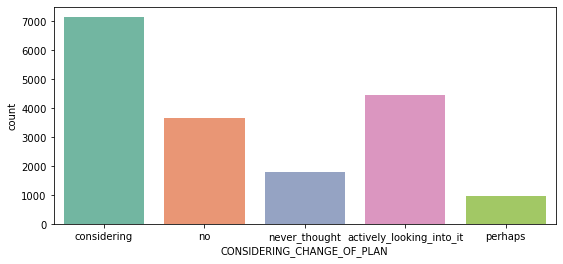

In [29]:
plt.figure(figsize=(9,4))
sns.countplot(data=mobile, x=feature, palette="Set2")
plt.show()

* 고려해본다는게 가장 높고
  그다음 높은 수치는 적극적으로 변경한다는 수치이다.
    >고려해본다는 고객의 마음을 잡아야 이탈을 방지할 수 있음(다양한 서비스제공이 필요)
* 이 변수는 기기변경에 대한 중요한 정보를 제공해준다.

### 6) COLLEGE : 대학졸업 여부(1,0)

In [36]:
feature='COLLEGE'

In [48]:
mobile[feature].isna().sum()

0

In [49]:
tmp=mobile[feature].value_counts()/len(mobile[feature])
tmp1=mobile[feature].value_counts()
print(tmp)

1    0.502722
0    0.497278
Name: COLLEGE, dtype: float64


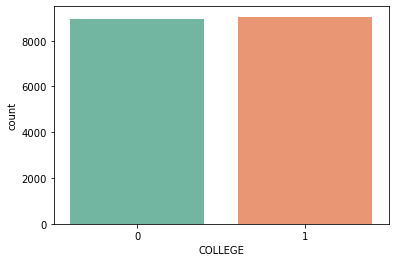

In [37]:
sns.countplot(data=mobile, x=feature, palette="Set2")
plt.show()

* 비율적으로 거의 반반이다

### 7) CHURN(target) : 이탈여부

In [40]:
target='CHURN'

In [51]:
mobile[feature].isna().sum()

0

In [52]:
tmp=mobile[feature].value_counts()/len(mobile[feature])
tmp1=mobile[feature].value_counts()
print(tmp)

1    0.502722
0    0.497278
Name: COLLEGE, dtype: float64


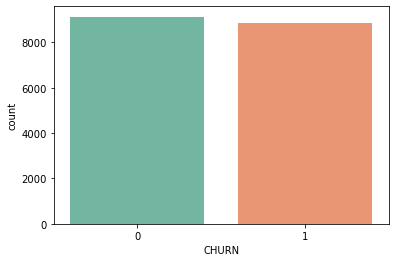

In [42]:
sns.countplot(data=mobile, x=target, palette="Set2")
plt.show()

* 이탈률이 50.27% => 굉장히 높은 수치이다.

## 1-2.이변량 분석 

In [66]:
target = 'CHURN'

### (1) 범주형 Feature --> CHURN

#### 1)COLLEGE --> CHURN

In [43]:
feature='COLLEGE'

In [44]:
pd.crosstab(mobile[target], mobile[feature], normalize='columns')

COLLEGE,0,1
CHURN,,
0,0.515697,0.49895
1,0.484303,0.50105


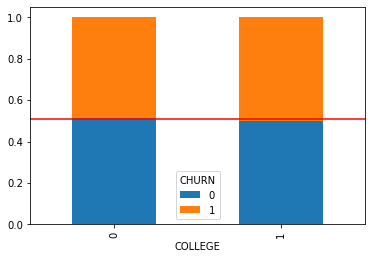

In [45]:
target_mean=mobile[target].mean()
temp = pd.crosstab(mobile[feature], mobile[target], normalize = 'index') #집계
temp.plot.bar(stacked=True)
plt.axhline(1-target_mean, color = 'r')
plt.show()

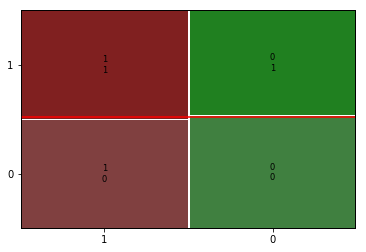

In [46]:
mosaic(mobile, [ feature, target])
plt.axhline(1- target_mean, color = 'r')
plt.show()

In [50]:
kai=pd.crosstab(mobile[target], mobile[feature])
print('교차표\n', kai)
print('-' * 100)

result = spst.chi2_contingency(kai)
print('카이제곱통계량 :', round(result[0],4))
print('p-value :', round(result[1],4))
print('자유도 :', result[2])

교차표
 COLLEGE     0     1
CHURN              
0        4616  4515
1        4335  4534
----------------------------------------------------------------------------------------------------
카이제곱통계량 : 4.9821
p-value : 0.0256
자유도 : 1


* 카이제곱통계량이 자유도의 2~3배 이상이고, p-value도 0.05보다 작다.

  하지만 그래프상 평균값과 두가지의 범주가 큰 차이가 없어서 중간 관계를 가질 것으로 생각된다.

>그래프상
졸업자의 이탈률이 미묘하게 더 크다.
대학을 졸업하면 보통 경제적으로 독립을 하기 때문에 휴대폰요금을 본인이 낼 것이다..
그래서 대학졸업자는 본인이 관리하기 때문에 좀 더 저렴하게 이용할수 있는 서비스를 찾을 것같다.
그 과정에서 약정이 끝난 후 더 좋은 조건이 있는 통신사로 이동 할 것이라고 예상했다

추가분석으로 연 수입액과 졸업여부를 판단하여 이직률을 알아봐도 좋을 것 같다.

In [108]:
mobile.groupby(feature, as_index=False)['INCOME'].mean()

,COLLEGE,INCOME
0,0,79906.901352
1,1,80717.486021


#### 2) REPORTED_SATISFACTION --> CHURN

In [181]:
feature='REPORTED_SATISFACTION'

In [74]:
pd.crosstab(mobile[target], mobile[feature], normalize='columns')

REPORTED_SATISFACTION,avg,sat,unsat,very_sat,very_unsat
CHURN,,,,,
0,0.527132,0.527897,0.499164,0.511618,0.50099
1,0.472868,0.472103,0.500836,0.488382,0.49901


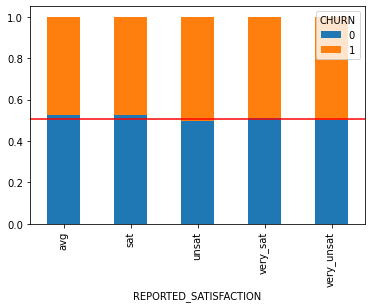

In [75]:
temp = pd.crosstab(mobile[feature], mobile[target], normalize = 'index') #집계
temp.plot.bar(stacked=True)
plt.axhline(1-target_mean, color = 'r')
plt.show()

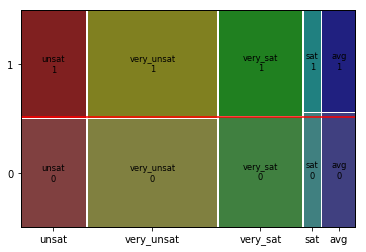

In [76]:
mosaic(mobile, [ feature, target])
plt.axhline(1- target_mean, color = 'r')
plt.show()

In [77]:
kai=pd.crosstab(mobile[target], mobile[feature])
print('교차표\n', kai)
print('-' * 100)

result = spst.chi2_contingency(kai)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])

교차표
 REPORTED_SATISFACTION  avg  sat  unsat  very_sat  very_unsat
CHURN                                                       
0                      952  492   1792      2334        3543
1                      854  440   1798      2228        3529
----------------------------------------------------------------------------------------------------
카이제곱통계량 6.8411009572056445
p-value 0.14452738878905066
자유도 4


* 수치상으로는 카이제곱통계량과 p-value 모두 관계가 없다라고 나옴

* 그래프상 
    보통, 만족 -> 평균보다 이탈률이 조금 낮음
* 하지만,
    데이터 양으로 따져봤을때 불만족인 고객이 50%정도가 넘고 평균보다 이탈률이 조금 
    높은 것으로 보아
    잠재적으로 이탈가능성 고객이 많을 것이라고 분석한다.

>어떤 이유때문에 불만족스러운지 추가 분석.
월 초과사용이 많은지, 핸드폰가격이 비싼지 등을 같이 분석

#### 3) CONSIDERING_CHANGE_OF_PLAN --> CHURN

In [78]:
feature='CONSIDERING_CHANGE_OF_PLAN'

In [79]:
pd.crosstab(mobile[target], mobile[feature], normalize='columns')

CONSIDERING_CHANGE_OF_PLAN,actively_looking_into_it,considering,never_thought,no,perhaps
CHURN,,,,,
0,0.511565,0.510853,0.513304,0.500274,0.475992
1,0.488435,0.489147,0.486696,0.499726,0.524008


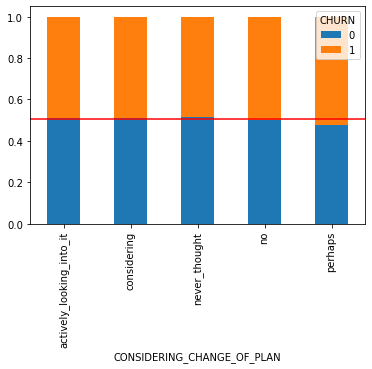

In [80]:
temp = pd.crosstab(mobile[feature], mobile[target], normalize = 'index') #집계
temp.plot.bar(stacked=True)
plt.axhline(1-target_mean, color = 'r')
plt.show()

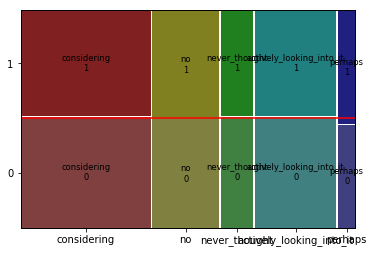

In [81]:
mosaic(mobile, [ feature, target])
plt.axhline(1- target_mean, color = 'r')
plt.show()

그래프 분석
이 변수는 기존 고객 유지에 중요한 변수라고 생각한다.
* perhaps 의 이직률이 평균보다 높다
 > 경쟁사의 요금제나 더 흥미로운 패키지 등
    다양한 이유를 통해 기기변경 했을 거라고 생각한다.

* 'considering', 'actively_looking_into_it' 데이터가 크다
 > 이 항목을 응답한 사용자의 이탈을 막아야 전체 이탈률을 줄일 수 있다. 
    경쟁사보다 솔깃한 제안을 할 필요가 있다. 
    많은 이벤트나 프로모션, 맞춤 요금제 서비스 등을 제공해야한다..

In [82]:
kai=pd.crosstab(mobile[target], mobile[feature])
print('교차표\n', kai)
print('-' * 100)

result = spst.chi2_contingency(kai)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])

교차표
 CONSIDERING_CHANGE_OF_PLAN  actively_looking_into_it  considering  \
CHURN                                                               
0                                               2278         3648   
1                                               2175         3493   

CONSIDERING_CHANGE_OF_PLAN  never_thought    no  perhaps  
CHURN                                                     
0                                     926  1823      456  
1                                     878  1821      502  
----------------------------------------------------------------------------------------------------
카이제곱통계량 5.421434419620689
p-value 0.2467222586679969
자유도 4


* 카이제곱검정
 수치상으론 관계없다고 나옴

### (2) 숫자형 Feature --> CHURN

#### 1) OVERAGE --> CHURN


In [110]:
feature='OVERAGE'

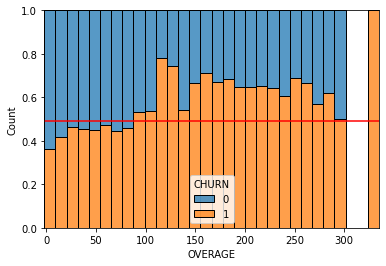

In [91]:
sns.histplot(x=feature, data = mobile, hue = target, multiple = 'fill', bins = 30)
plt.axhline(target_mean, color = 'r')
plt.show()

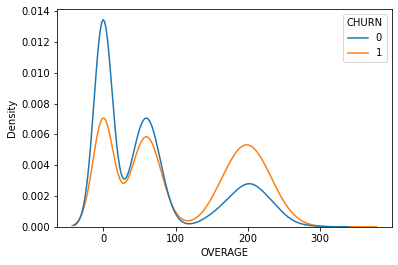

In [85]:
sns.kdeplot(x=feature, data = mobile, hue =target, common_norm=False)
plt.show()

* 그래프 분석
그래프를 볼때 90분 이상 초과한 사람들부터 이탈하는 비율이 증가하였다
마지막 300이상 사용한 사람은 그냥 이탈100%(이상치 같음)
월초과사용시간이 0인 사람들은 잔류하는 사람의 수가 압도적으로 크다
>100분이 넘는 사람들은 그만큼 추가 요금이 붙어 요금이 많이 나갈것이다
  그러면 통화가 무제한인 요금제를 찾을 것이고 여러 통신사를 비교하다가 더 좋은 조건이
  있다면 이탈할 확률이 높다.

In [86]:
model = sm.Logit(mobile[target], mobile[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.680553
         Iterations 4
OVERAGE    3.521095e-97
dtype: float64


* 로지스틱회귀 
 강한관계

* 추가분석

구간을 0,30-100,150-250 구분해서 분석해 볼 필요 있음

#### 2) INCOME --> CHURN


In [95]:
feature='INCOME'

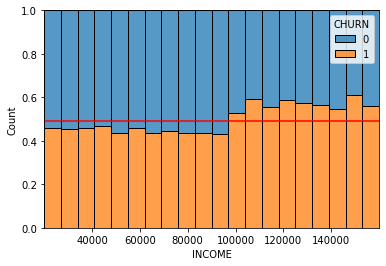

In [100]:
sns.histplot(x=feature, data = mobile, hue = target, multiple = 'fill', bins = 20)
plt.axhline(target_mean, color = 'r')
plt.show()

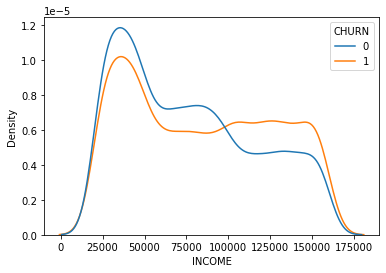

In [97]:
sns.kdeplot(x=feature, data = mobile, hue =target, common_norm=False)
plt.show()

* 그래프상
10만 좀 안되는 값에서 이탈변화가 생긴다
10만달러를 기준으로 그 전은 잔류하고 그 후는 이탈하는 비율이 높게 나왔다.
연수입 10만 달러(약 1억2천만원) 를 기준으로 바뀌는 이유가 있을까?

> 경제적으로 여유가 있으면 신상제품이 나왔을때 새로 구입하여 사는 과정에서 이탈 할 것같다.

In [98]:
model = sm.Logit(mobile[target], mobile[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692683
         Iterations 2
INCOME    0.000044
dtype: float64


* 0.05보다 작으므로 관계가 있다.
> 범주를 10만 기준으로 나눠 카이검정으로 확인해보자

#### 3) HANDSET_PRICE --> CHURN


In [101]:
feature='HANDSET_PRICE'

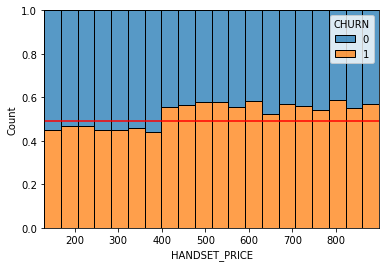

In [103]:
sns.histplot(x=feature, data = mobile, hue = target, multiple = 'fill', bins = 20)
plt.axhline(target_mean, color = 'r')
plt.show()

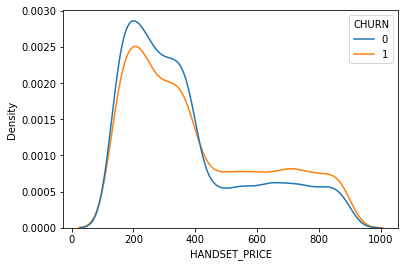

In [104]:
sns.kdeplot(x=feature, data = mobile, hue =target, common_norm=False)
plt.show()

*그래프 분석
400달러 전후로 이탈률이 달라진다(전-잔류, 후-이탈)
보통 휴대폰 구입시 요금제와 기기값을 같이 납부하게 되는데 기기값이 비싸다면 
싼 요금제를 찾게 된다. 그 시점에서 요금제가 자신에게 적합하고 만족한다면 호감도가 늘어 
현재 통신사를 계속 이용할 것이다.

> 400 전 : 보급형이나 공시지원금 등 할인을 받아 저렴하게 사서 이용했을 수 있다.
        자신에게 알맞은 요금제 사용을 했거나,
        새로 구입할 시점에 저렴하게 사용했던 경험으로 잔류했을 거라고 생각한다.
          
          
> 400 후 : 기기값 자체가 비싸다 보니 통신사를 옮기면 좀더 할인해주는 제도가 있기에 많이
    이탈하지 않을 까 생각한다. 그리고 서비스가 불만족 스러웠거나 맞지않은 요금제를 
    사용하여 나쁜 서비스 경험을 했을 때 이탈률이 증가 할 거라고 생각한다.

* 추가분석
400달러 이상의 사용자 중 만족도 비율을 분석해보자.

In [105]:
model = sm.Logit(mobile[target], mobile[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692730
         Iterations 3
HANDSET_PRICE    0.000107
dtype: float64


* p-value가 0.05보다 작아 강한 관계라고 볼 수 있다.

#### 4) LEFTOVER --> CHURN


In [195]:
feature='LEFTOVER'

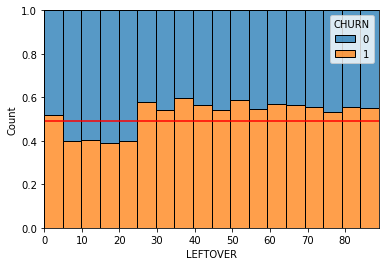

In [193]:
sns.histplot(x=feature, data = mobile, hue = target, multiple = 'fill', bins = 18)
plt.axhline(target_mean, color = 'r')
plt.show()

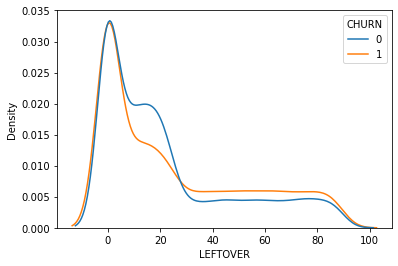

In [191]:
sns.kdeplot(x=feature, data = mobile, hue =target, common_norm=False)
plt.show()

* 그래프 분석
> 0% 구간과 25%이상 구간에서 평균보다 이탈률이 높게 나옴
-0%는 본인의 요금제보다 더 초과해서 사용했다고 볼 수 있다.
-25%이상은 기본 통화시간보다 많이 사용하지 못하여 본인에게 알맞지 않은 요금제라고
생각 할 수 있다. 

> 5% - 25% 구간은 자신의 요금제에 맞게 여유롭게 사용했다고 생각함

In [196]:
model = sm.Logit(mobile[target], mobile[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692532
         Iterations 3
LEFTOVER    0.000003
dtype: float64


* p-value가 0.05보다 작아 관계가 있다고 볼 수 있다.

## 4.관계 정리

### 1) 강한관계의 변수

In [ ]:
HANDSET_PRICE, OVERAGE, INCOME, LEFTOVER

### 2) 약한관계의 변수

In [ ]:
COLLEGE

### 3) 관계 없음

In [ ]:
REPORTED_SATISFACTION , CONSIDERING_CHANGE_OF_PLAN

## 5.추가 분석

**OVERAGE**
1. 구간을 0,30-100,150-250 구분해서 분석해 볼 필요 있음

In [117]:
bin=[0,30,100,150,250]
label = ['L','M1','M2','H']
mobile['over_grp']=pd.cut(mobile[feature], bins=bin, labels=label, right=False)

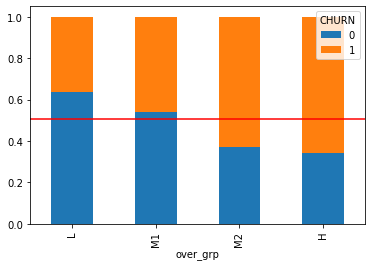

In [115]:
temp= pd.crosstab(mobile['over_grp'], mobile[target], normalize='index')
temp.plot.bar(stacked=True)
plt.axhline(1-target_mean, color = 'r')
plt.show()

In [116]:
table=pd.crosstab(mobile[target], mobile['over_grp'])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])


카이제곱통계량 1054.6832956058158
p-value 2.4679966724382166e-228
자유도 3


* 범주를 나눠 카이제곱검정을 했더니 완전 강한 관계를 나타내는 것을 알 수 있음
  그래프 상으로도 각 범주에 해당되는 이탈률이 다름
  110분 이상 초과하면 이탈률이 많이 증가한다 
  > 통화를 많이 하는 사람들에게 합당한 요금제가 없어서 이탈했을 거라고 예상한다.

2. HANDSET_PRICE

In [148]:
feature='HANDSET_PRICE'
bin=[0,400, np.inf]
label = ['L','H']
mobile['price_grp']=pd.cut(mobile[feature], bins=bin, labels=label, right=False)

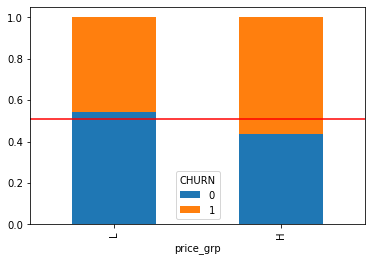

In [149]:
temp= pd.crosstab(mobile['price_grp'], mobile[target], normalize='index')
temp.plot.bar(stacked=True)
plt.axhline(1-target_mean, color = 'r')
plt.show()

In [150]:
table=pd.crosstab(mobile[target], mobile['price_grp'])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])

카이제곱통계량 187.09213970859884
p-value 1.3711320809836095e-42
자유도 1


* 카이제곱검정을 하니  더 강한관계인 것을 알 수 있음

400달러 이상의 사용자 중 만족도 비율을 분석해보자.

In [121]:
feature='HANDSET_PRICE'

In [126]:
mobile['HANDSET_PRICE'].count()

18000

In [136]:
tmp=mobile.loc[mobile[feature]>=400]

* 총 18000데이터 중 핸드폰 가격이 400달러 넘는 사용자는 6113 >> 약34%
  

In [137]:
#unsat, very_unsat 의 수치 중 핸드폰 가격이 비싼지 분석
data = tmp.groupby(['REPORTED_SATISFACTION'], as_index=False)[feature].agg(['max',min,'mean'])
data

,max,min,mean
REPORTED_SATISFACTION,,,
avg,899,400,651.275527
sat,898,401,660.141176
unsat,899,400,655.749363
very_sat,898,400,650.791990
very_unsat,899,400,645.997931


3. INCOME -> 범주 세분화해서 카이제곱검정

In [177]:
feature='INCOME'
bin=[0,100000, np.inf]
label = ['L','H']
mobile['income_grp']=pd.cut(mobile[feature], bins=bin, labels=label, right=False)

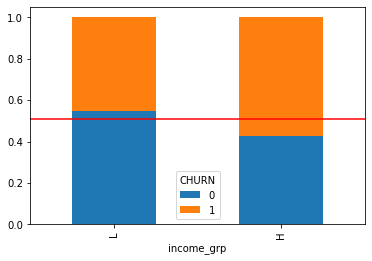

In [178]:
temp= pd.crosstab(mobile['income_grp'], mobile[target], normalize='index')
temp.plot.bar(stacked=True)
plt.axhline(1-target_mean, color = 'r')
plt.show()

In [179]:
table=pd.crosstab(mobile[target], mobile['income_grp'])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])

카이제곱통계량 243.5094787317262
p-value 6.753130507282287e-55
자유도 1


* 10만달러 이전은 평균보다 잔존률이 더 높고 이후는 이탈률이 더 높다.
> 경제적으로 여유 
* 범주를 나눠 카이제곱검정을 한 결과 수치상으로 더 강한 관계임을 알 수 있다

## 2.데이터 전처리 

In [58]:
target = 'CHURN'

### 2.1 데이터 정리

In [59]:
x = mobile.drop(target, axis = 1)
y = mobile.loc[:, target]

* 불필요한 feature 제거

In [62]:
mobile.corr()[target]

id                             0.003499
COLLEGE                        0.016748
INCOME                         0.094168
OVERAGE                        0.237797
LEFTOVER                       0.060022
HOUSE                         -0.211020
HANDSET_PRICE                  0.086517
OVER_15MINS_CALLS_PER_MONTH    0.206578
AVERAGE_CALL_DURATION         -0.006333
CHURN                          1.000000
Name: CHURN, dtype: float64

In [63]:
# id는 고유번호이기에 target에 영향을 미치지 않으므로 제거합니다.
# AVERAGE_CALL_DURATION는 target과의 상관관계가 작다고 판단하여 제거합니다.
cols= ['id','AVERAGE_CALL_DURATION']
x.drop(columns=cols, axis=1,inplace = True)

### 2.2 NaN에 대한 조치

In [64]:
x.isna().sum()

COLLEGE                          0
INCOME                           0
OVERAGE                          0
LEFTOVER                         0
HOUSE                          215
HANDSET_PRICE                    0
OVER_15MINS_CALLS_PER_MONTH      0
REPORTED_SATISFACTION           38
REPORTED_USAGE_LEVEL             0
CONSIDERING_CHANGE_OF_PLAN       0
dtype: int64

'HOUSE'

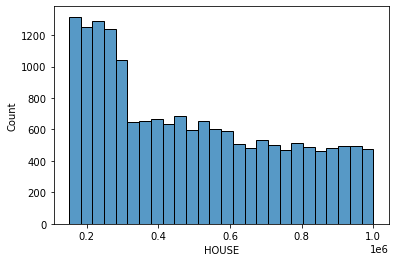

In [65]:
sns.histplot(mobile['HOUSE'])
plt.show()

In [76]:
x['HOUSE'].fillna(x['HOUSE'].mean(), inplace=True)

'REPORTED_SATISFACTION '

In [77]:
mobile['REPORTED_SATISFACTION'].value_counts()

very_unsat    7072
very_sat      4562
unsat         3590
avg           1806
sat            932
Name: REPORTED_SATISFACTION, dtype: int64

In [78]:
# 설문조사 이기때문에 최빈값으로 채움
x['REPORTED_SATISFACTION'].fillna('very_unsat', inplace=True)

In [79]:
x.isna().sum()

COLLEGE                        0
INCOME                         0
OVERAGE                        0
LEFTOVER                       0
HOUSE                          0
HANDSET_PRICE                  0
OVER_15MINS_CALLS_PER_MONTH    0
REPORTED_SATISFACTION          0
REPORTED_USAGE_LEVEL           0
CONSIDERING_CHANGE_OF_PLAN     0
dtype: int64

### 2.3 가변수화

In [80]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   COLLEGE                      18000 non-null  int64  
 1   INCOME                       18000 non-null  int64  
 2   OVERAGE                      18000 non-null  int64  
 3   LEFTOVER                     18000 non-null  int64  
 4   HOUSE                        18000 non-null  float64
 5   HANDSET_PRICE                18000 non-null  int64  
 6   OVER_15MINS_CALLS_PER_MONTH  18000 non-null  int64  
 7   REPORTED_SATISFACTION        18000 non-null  object 
 8   REPORTED_USAGE_LEVEL         18000 non-null  object 
 9   CONSIDERING_CHANGE_OF_PLAN   18000 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 1.4+ MB


In [81]:
cols=['REPORTED_SATISFACTION','REPORTED_USAGE_LEVEL','CONSIDERING_CHANGE_OF_PLAN']
x = pd.get_dummies(x, columns=cols, drop_first=True)

In [82]:
x['HOUSE'].astype('int')

0        730589
1        535092
2        204004
3        281969
4        216707
          ...  
17995    492950
17996    492950
17997    492950
17998    492950
17999    492950
Name: HOUSE, Length: 18000, dtype: int32

### 2.4 데이터 분할

* test 3000건(test_size = 3000), random_state = 2022
* val 3000건(test_size = 3000), random_state = 2022
* train 나머지

In [85]:
# test데이터는 최종적으로 모델 성능을 도출할 때 사용할 데이터이다.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=3000, random_state=2022)

In [86]:
# val데이터를 통하여 예측하고 성능을 비교할 때 사용할 것이다.
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=3000, random_state=2022)

In [87]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape, x_val.shape, y_val.shape

((12000, 19), (3000, 19), (12000,), (3000,), (3000, 19), (3000,))

### 2.5스케일링 
* 스케일링을 필요로 하는 알고리즘 존재(SVM, KNN, DeepLearning)

In [88]:
from sklearn.preprocessing import MinMaxScaler

In [89]:
scaler = MinMaxScaler()
x_train_sc = scaler.fit_transform(x_train)
x_val_sc = scaler.transform(x_val)
x_test_sc = scaler.transform(x_test)

## 3.모델링 : 머신러닝

In [90]:
# 사용할 알고리즘
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# 성능 검증
from sklearn.model_selection import GridSearchCV

# 성능 평가
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report

### 3.1 모델링

#### (1) Logistic Regression

In [91]:
model = LogisticRegression(max_iter=500)
model.fit(x_train, y_train)
y_pred = model.predict(x_val)

In [92]:
result_report={}
result_report['Logistic Regression']=classification_report(y_val, y_pred)

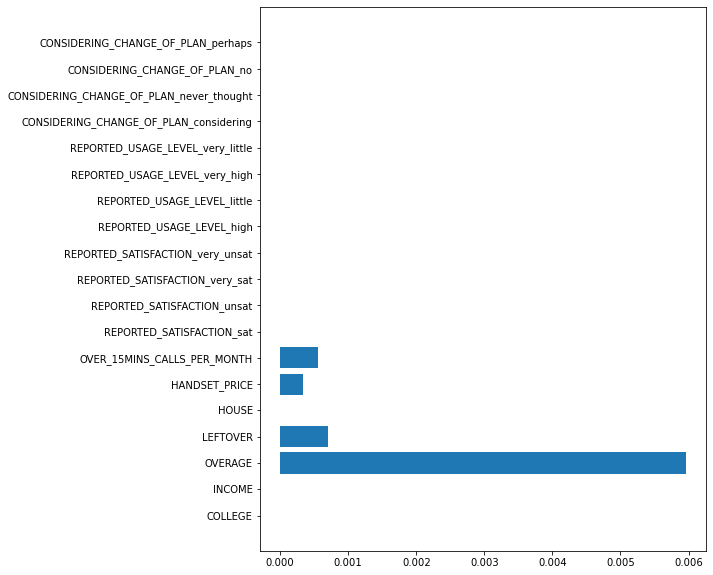

In [93]:
# 변수 가중치 시각화
plt.figure(figsize=(8,10))
plt.barh(y=list(x), width=model.coef_.reshape(-1))
plt.show()

#### (2) Decision Tree

In [127]:
model_dt = DecisionTreeClassifier(random_state=2022)
param = {'max_depth' : range(1,51) }
model= GridSearchCV(model_dt, param, cv=5, scoring='accuracy')

In [128]:
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'max_depth': range(1, 51)}, scoring='accuracy')

In [97]:
# 최적의 파라미터 확인
print('파라미터: ', model.best_params_)
print('성능: ', model.best_score_)

파라미터:  {'max_depth': 4}
성능:  0.6999166666666667


In [98]:
y_pred = model.predict(x_val)

In [99]:
result_report['Decision Tree']=classification_report(y_val, y_pred)

In [100]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.64      0.70      1520
           1       0.68      0.79      0.73      1480

    accuracy                           0.72      3000
   macro avg       0.72      0.72      0.71      3000
weighted avg       0.72      0.72      0.71      3000



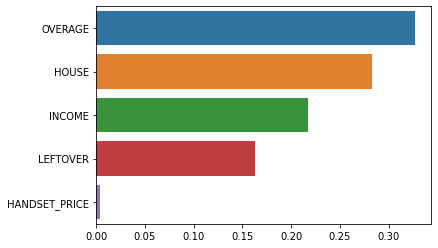

In [101]:
# 변수 중요도 시각화
IMP = model.best_estimator_.feature_importances_
feature_IMP = pd.Series(IMP, x.columns)
important = feature_IMP.sort_values(ascending=False)[:5]

sns.barplot(x=important, y=important.index)
plt.show()

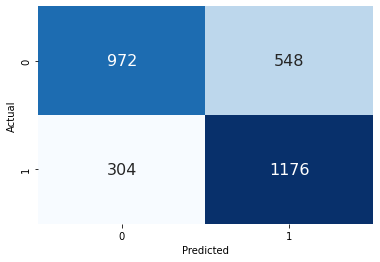

In [102]:
# 시각화
sns.heatmap(confusion_matrix(y_val, y_pred), 
            annot=True, 
            cmap="Blues", 
            cbar=False,
            annot_kws={'size':16},
            fmt='g'  
           )
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

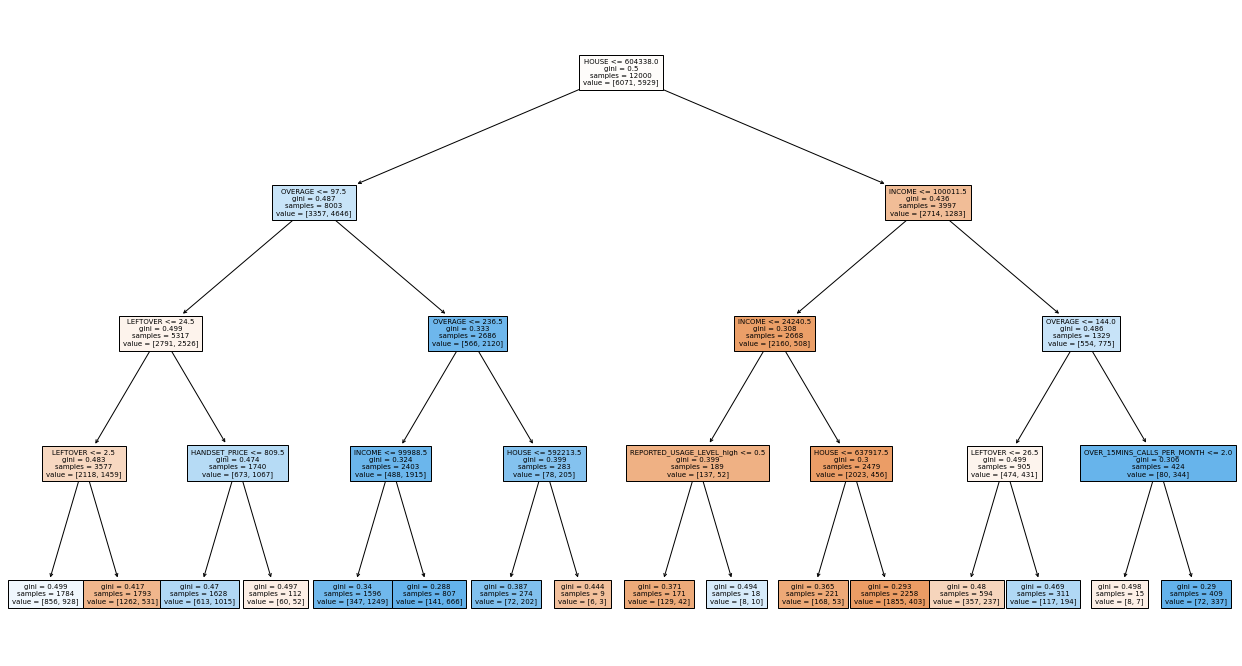

In [103]:
# 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(22, 12))
plot_tree(model.best_estimator_,
         filled=True,
         feature_names=list(x),
         fontsize=7)
plt.show()

#### (3) SVM

In [104]:
model_svm = SVC(random_state=2022)
param ={
     'C': [0.1,1,10, 50],
    'gamma': [0.01, 0.1]}

model = GridSearchCV(model_svm,
                    param,
                    cv=5,
                    scoring='accuracy')

In [105]:
model.fit(x_train_sc, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=2022),
             param_grid={'C': [0.1, 1, 10, 50], 'gamma': [0.01, 0.1]},
             scoring='accuracy')

In [107]:
# 최적파라미터, 성능 확인
print('최적파라미터: ', model.best_params_)
print('성능: ', model.best_score_)

최적파라미터:  {'C': 10, 'gamma': 0.1}
성능:  0.6599999999999999


In [106]:
y_pred = model.predict(x_val_sc)
result_report['SVM']=classification_report(y_val, y_pred)

#### (4) XGB 

In [108]:
model_xgb = XGBClassifier(eval_metric='logloss')
params={
    'max_depth':range(7,11),
    'n_estimators':range(100,120,10)
}
model=GridSearchCV(model_xgb,params,cv=5,scoring='accuracy')

In [109]:
model.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
          

In [110]:
# 최적파라미터, 성능 확인
print('최적파라미터: ', model.best_params_)
print('성능: ', model.best_score_)

최적파라미터:  {'max_depth': 8, 'n_estimators': 100}
성능:  0.675


In [111]:
y_pred = model.predict(x_val)
result_report['XGB']=classification_report(y_val, y_pred)

## 4.모델링 : DL

In [113]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

In [114]:
x_train.shape, y_train.shape

((12000, 19), (12000,))

#### (1) Sequential API 1

In [115]:
#히든레이어 3개를 사용(128, 64, 32) 노드수를 크게 주지 않았다

keras.backend.clear_session()

DL1 = keras.models.Sequential()
DL1.add(keras.layers.Input(shape=(19,)))
DL1.add(keras.layers.Dense(128, activation='relu')) 
DL1.add(keras.layers.Dense(64, activation='relu'))
DL1.add(keras.layers.Dense(32, activation='relu'))
DL1.add(keras.layers.Dense(1, activation='sigmoid'))

DL1.compile(loss=keras.losses.binary_crossentropy, 
            optimizer='adam', metrics=['accuracy'])
DL1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2560      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,929
Trainable params: 12,929
Non-trainable params: 0
_________________________________________________________________


In [116]:
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, restore_best_weights=True)

In [117]:
hist1 = DL1.fit(x_train_sc, y_train, epochs=1000, verbose=1, callbacks=[es],
        validation_split=0.2, batch_size=16)

Epoch 1/1000
600/600 [==============================] - 2s 2ms/step - loss: 0.6436 - accuracy: 0.6277 - val_loss: 0.6434 - val_accuracy: 0.6429
Epoch 2/1000
600/600 [==============================] - 1s 2ms/step - loss: 0.6234 - accuracy: 0.6491 - val_loss: 0.6336 - val_accuracy: 0.6538
Epoch 3/1000
600/600 [==============================] - 1s 2ms/step - loss: 0.6149 - accuracy: 0.6582 - val_loss: 0.6343 - val_accuracy: 0.6488
Epoch 4/1000
600/600 [==============================] - 1s 2ms/step - loss: 0.6115 - accuracy: 0.6644 - val_loss: 0.6275 - val_accuracy: 0.6654
Epoch 5/1000
600/600 [==============================] - 1s 2ms/step - loss: 0.6071 - accuracy: 0.6701 - val_loss: 0.6287 - val_accuracy: 0.6550
Epoch 6/1000
600/600 [==============================] - 1s 2ms/step - loss: 0.6019 - accuracy: 0.6784 - val_loss: 0.6242 - val_accuracy: 0.6575
Epoch 7/1000
600/600 [==============================] - 1s 2ms/step - loss: 0.5988 - accuracy: 0.6776 - val_loss: 0.6237 - val_accuracy:

In [118]:
y_pred = DL1.predict(x_val)

In [119]:
result_report['DL1']=classification_report(y_val, y_pred)
print(classification_report (y_val, y_pred))

              precision    recall  f1-score   support

           0       0.51      1.00      0.67      1520
           1       0.00      0.00      0.00      1480

    accuracy                           0.51      3000
   macro avg       0.25      0.50      0.34      3000
weighted avg       0.26      0.51      0.34      3000



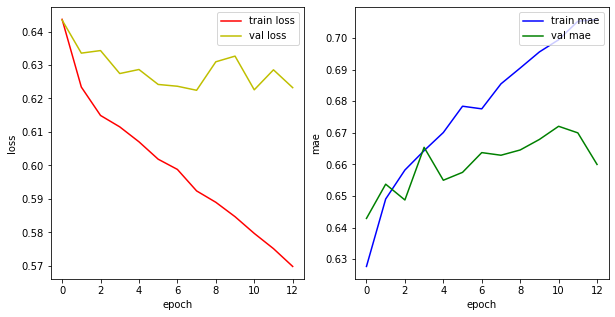

In [120]:
plt.figure(figsize=(10,5))
loss_ax = plt.subplot(1,2,1)
acc_ax =plt.subplot(1,2,2)


loss_ax.plot(hist1.history['loss'], 'r', label = 'train loss')
loss_ax.plot(hist1.history['val_loss'], 'y', label = 'val loss')

acc_ax.plot(hist1.history['accuracy'], 'b', label = 'train mae')
acc_ax.plot(hist1.history['val_accuracy'], 'g', label = 'val mae')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_xlabel('epoch')
acc_ax.set_ylabel('mae')

loss_ax.legend(loc='upper right')
acc_ax.legend(loc='upper right')

plt.show()

#### (2) Funtional API

In [121]:
#히든레이어 5개를 사용(512,512,256, 128, 64) 
# 노드수와 히든레이어를 앞모델에 비해 크게 줘보도록 하였다
keras.backend.clear_session()

il = keras.layers.Input(shape=(19,))
hl = keras.layers.Dense(512, activation='relu')(il)
hl = keras.layers.Dense(512, activation='relu')(hl)
hl = keras.layers.Dense(256, activation='relu')(hl)
hl = keras.layers.Dense(128, activation='relu')(hl)
hl = keras.layers.Dense(64, activation='relu')(hl)
ol = keras.layers.Dense(1, activation='sigmoid')(hl)

DL2 = keras.models.Model(il,ol)
DL2.compile(loss=keras.losses.binary_crossentropy, optimizer='adam',metrics=['accuracy'])
DL2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 19)]              0         
                                                                 
 dense (Dense)               (None, 512)               10240     
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65    

In [122]:
hist2 = DL2.fit(x_train_sc, y_train, epochs=1000, verbose=1, callbacks=[es],
        validation_split=0.2, batch_size=16)

Epoch 1/1000
600/600 [==============================] - 4s 5ms/step - loss: 0.6468 - accuracy: 0.6202 - val_loss: 0.6341 - val_accuracy: 0.6421
Epoch 2/1000
600/600 [==============================] - 3s 6ms/step - loss: 0.6272 - accuracy: 0.6527 - val_loss: 0.6313 - val_accuracy: 0.6583
Epoch 3/1000
600/600 [==============================] - 4s 6ms/step - loss: 0.6196 - accuracy: 0.6574 - val_loss: 0.6265 - val_accuracy: 0.6587
Epoch 4/1000
600/600 [==============================] - 4s 6ms/step - loss: 0.6135 - accuracy: 0.6604 - val_loss: 0.6325 - val_accuracy: 0.6675
Epoch 5/1000
600/600 [==============================] - 3s 5ms/step - loss: 0.6097 - accuracy: 0.6725 - val_loss: 0.6323 - val_accuracy: 0.6596
Epoch 6/1000
600/600 [==============================] - 3s 5ms/step - loss: 0.6033 - accuracy: 0.6798 - val_loss: 0.6237 - val_accuracy: 0.6612
Epoch 7/1000
600/600 [==============================] - 3s 5ms/step - loss: 0.6001 - accuracy: 0.6815 - val_loss: 0.6235 - val_accuracy:

In [123]:
y_pred = DL2.predict(x_val)

In [124]:
result_report['DL2']=classification_report(y_val, y_pred)
print(classification_report (y_val, y_pred))

              precision    recall  f1-score   support

           0       0.51      1.00      0.67      1520
           1       0.00      0.00      0.00      1480

    accuracy                           0.51      3000
   macro avg       0.25      0.50      0.34      3000
weighted avg       0.26      0.51      0.34      3000



In [125]:
result_report['DL2']=classification_report(y_val, y_pred)
print(classification_report (y_val, y_pred))

              precision    recall  f1-score   support

           0       0.51      1.00      0.67      1520
           1       0.00      0.00      0.00      1480

    accuracy                           0.51      3000
   macro avg       0.25      0.50      0.34      3000
weighted avg       0.26      0.51      0.34      3000



#### (3) ANN
변수 중요도를 통하여 높은 수치의 피쳐 4개와 조금 관련이 있는 피쳐 3개를 Concatenate()
함수를 통하여 모델을 만들었다.

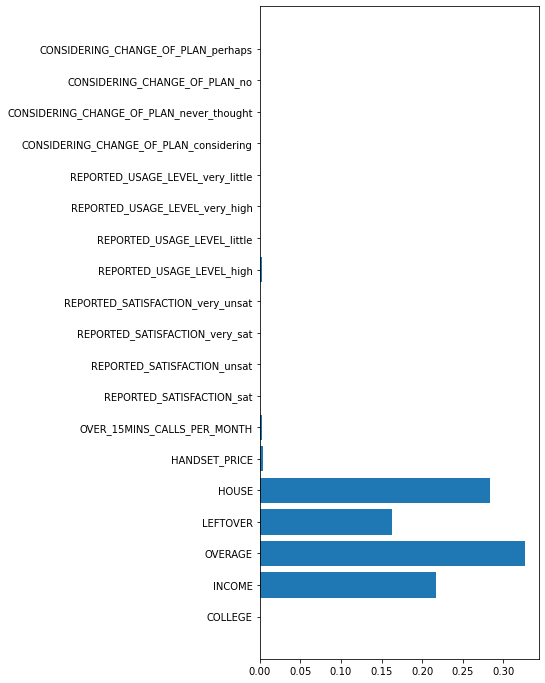

In [129]:
# 변수 중요도 시각화 : 그나마 정확도 높은 모델인 Decision Tree Model
plt.figure(figsize=(5, 12))
plt.barh(y=list(x), width=model.best_estimator_.feature_importances_)
plt.show()

In [130]:
x_train_split_1 = x_train[['INCOME','OVERAGE','LEFTOVER','HOUSE']]
x_train_split_2 = x_train[['HANDSET_PRICE','OVER_15MINS_CALLS_PER_MONTH','REPORTED_USAGE_LEVEL_high']]

x_val_split_1 = x_val[['INCOME','OVERAGE','LEFTOVER','HOUSE']]
x_val_split_2 = x_val[['HANDSET_PRICE','OVER_15MINS_CALLS_PER_MONTH','REPORTED_USAGE_LEVEL_high']]

x_test_split_1 = x_test[['INCOME','OVERAGE','LEFTOVER','HOUSE']]
x_test_split_2 = x_test[['HANDSET_PRICE','OVER_15MINS_CALLS_PER_MONTH','REPORTED_USAGE_LEVEL_high']]

In [131]:
x_train_split_1.shape, x_train_split_2.shape

((12000, 4), (12000, 3))

In [132]:
keras.backend.clear_session()

il1 = keras.layers.Input(shape=(4,))
hl1 = keras.layers.Dense(128, activation='relu')(il1)

il2 = keras.layers.Input(shape=(3,))
hl2 = keras.layers.Dense(128, activation='relu')(il2)

cl = keras.layers.Concatenate()([hl1, hl2])
ol = keras.layers.Dense(1, activation='sigmoid')(cl)

DL3= keras.models.Model([il1, il2], ol)

DL3.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam())

DL3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 3)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 128)          640         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 128)          512         ['input_2[0][0]']                
                                                                                              

In [133]:
hist3 = DL3.fit([x_train_split_1, x_train_split_2], y_train, epochs=1000, verbose=1, callbacks=[es],
        validation_split=0.2, batch_size=16)

Epoch 1/1000
600/600 [==============================] - 1s 2ms/step - loss: 423.8217 - val_loss: 357.2673
Epoch 2/1000
600/600 [==============================] - 1s 2ms/step - loss: 340.1477 - val_loss: 119.1461
Epoch 3/1000
600/600 [==============================] - 1s 2ms/step - loss: 329.0331 - val_loss: 387.5458
Epoch 4/1000
600/600 [==============================] - 1s 2ms/step - loss: 365.4109 - val_loss: 141.0757
Epoch 5/1000
600/600 [==============================] - 1s 2ms/step - loss: 285.6780 - val_loss: 85.5293
Epoch 6/1000
600/600 [==============================] - 1s 2ms/step - loss: 313.8445 - val_loss: 203.5456
Epoch 7/1000
600/600 [==============================] - 1s 2ms/step - loss: 261.6686 - val_loss: 338.4625
Epoch 8/1000
600/600 [==============================] - 1s 2ms/step - loss: 242.1591 - val_loss: 231.1611
Epoch 9/1000
600/600 [==============================] - 1s 2ms/step - loss: 232.3865 - val_loss: 322.4207
Epoch 10/1000
600/600 [========================

In [134]:
y_pred = DL3.predict([x_val_split_1, x_val_split_2])

In [135]:
y_pred

array([[1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       ...,
       [0.0000000e+00],
       [3.4406408e-13],
       [1.0000000e+00]], dtype=float32)

In [136]:
for idx, val in enumerate(y_pred):
    if y_pred[idx] >=0.5:
        y_pred[idx] = 1
    else:
        y_pred[idx] = 0

In [137]:
result_report['DL3']=classification_report(y_val, y_pred)
print(classification_report (y_val, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67      1520
           1       0.66      0.60      0.63      1480

    accuracy                           0.65      3000
   macro avg       0.65      0.65      0.65      3000
weighted avg       0.65      0.65      0.65      3000



## 5.성능 비교

### 5.1 평가지표 결정
>프로젝트의 목표는 현재 고객수를 유지하기 위하여 고객 이탈율을 줄이기 위한 모델을 만들고 예측하여 
문제를 해결하는것 입니다. 실제 이탈을 한 사람들의 통화 패턴이나 사용량, 그 외에 외부적으로 주는 요인에 대한 특징을 파악하고 문제를 해결해야 한다고 판단하였습니다.
따라서 실제 이탈고객이 이탈을 했는지에 관한 성능인 **recall**로 성능을 비교하겠습니다.

### 5.2 성능 비교

In [138]:
for m_name, score in result_report.items():
    print('=' * 40)
    print(m_name)
    print(score)

Logistic Regression
              precision    recall  f1-score   support

           0       0.64      0.65      0.65      1520
           1       0.64      0.62      0.63      1480

    accuracy                           0.64      3000
   macro avg       0.64      0.64      0.64      3000
weighted avg       0.64      0.64      0.64      3000

Decision Tree
              precision    recall  f1-score   support

           0       0.76      0.64      0.70      1520
           1       0.68      0.79      0.73      1480

    accuracy                           0.72      3000
   macro avg       0.72      0.72      0.71      3000
weighted avg       0.72      0.72      0.71      3000

SVM
              precision    recall  f1-score   support

           0       0.65      0.75      0.70      1520
           1       0.70      0.59      0.64      1480

    accuracy                           0.67      3000
   macro avg       0.68      0.67      0.67      3000
weighted avg       0.68      0.67   

#### 비교해 봤을 때 Decision Tree 모델이 가장 성능이 좋기 때문에 최종모델로 선정하게 되었다. 

# 비즈니스 인사이트

1. 요금제 선택 폭 확대
- 잔여 통화량이나 초과 사용량을 보면 사람마다 통화시간이 다소 남거나 부족한 경우가 보인다. 이는 요금제의 다양성이 부족하여 생긴 문제로 예상된다.
> 다양한 요금제의 출시가 필요해보임

2. 다양한 서비스 제공
- 요금제 다양화뿐만 아니라 사용 연차에 따른 멤버십 혜택 제공 및 통신 할인율, 부가서비스 등을 증가시킴으로써 불만을 개선시켜야 한다.

3. 추천 서비스 도입
- 고객의 사용량을 분석하여 이에 따른 요금제 추천 서비스를 도입하면 이탈률 감소를 예상된다.

4. 차별 없는 서비스
- 시골 지역의 고객들이 상대적으로 이탈률이 높다. 이것은 통화 품질 및 인터넷 속도 차이에서 발생하는 이탈률로 예상된다.
> 시골 지역에 통신 인프라를 구축함으로써 도시 지역과 차별 첪는 서비스를 제공할 필요해 보임

5. 좋은 서비스 경험 제공
- 기존 고객유지에 힘쓰기 위하여 기기 값을 경쟁력 있는 가격으로 판매하거나 소비자의 서비스나 제품에 대한 컴플레인을 적극 수용하는 자세가 필요할 것 같다.